<a href="https://colab.research.google.com/github/Robert-Gomez-AI/HeartFailure/blob/main/M3U4_fase_3_Entendimiento_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://drive.google.com/uc?export=view&id=1rSrsZ04aJ_D3BC67Cy2dBUZ6tmguydNf" alt = "Encabezado MLDS" width = "100%">  </img>

# **Entendimiento y carga de los datos**
---

Este notebook es una plantilla que le puede servir como guía para el tercer entregable del proyecto aplicado.

In [23]:
# Cargamos los datos
import requests as re

data=re.get("https://datasets-server.huggingface.co/rows?dataset=dair-ai%2Femotion&config=split&split=train&offset=0&length=100")

In [24]:
dict_df=dict(data.json())

In [29]:
data=[row["row"] for row in dict_df["rows"]]

In [30]:
import pandas as pd

df = pd.DataFrame(data)

In [31]:
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
95,i feel like throwing away the shitty piece of ...,0
96,im starting to feel wryly amused at the banal ...,1
97,i find every body beautiful and only want peop...,1
98,i hear are owners who feel victimized by their...,0


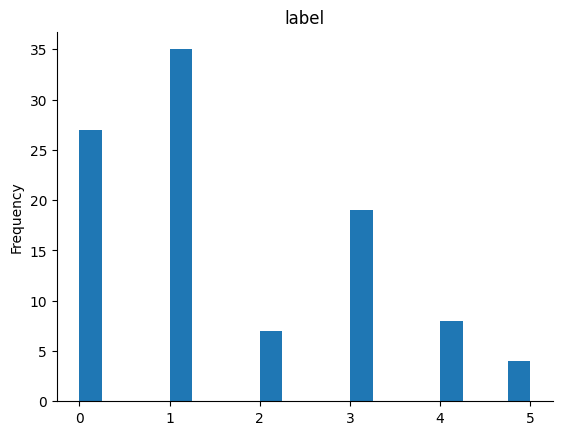

In [32]:
# @title label

from matplotlib import pyplot as plt
df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('texto', 3), ('primer', 1), ('aquí', 1), ('palabras', 1), ('tercero', 1), ('lista', 1)]


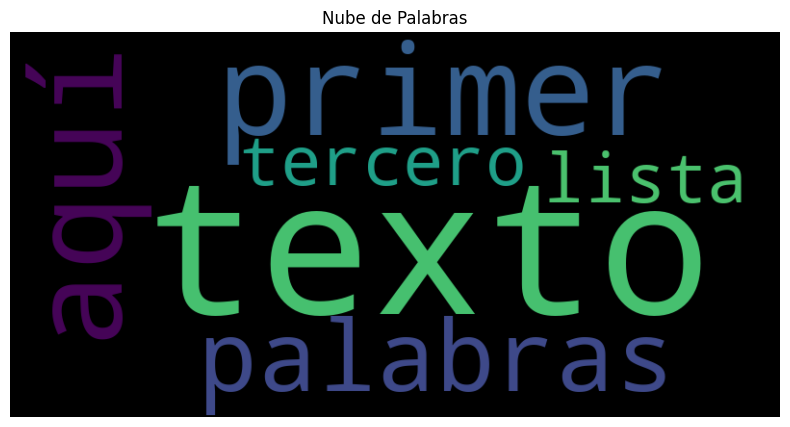

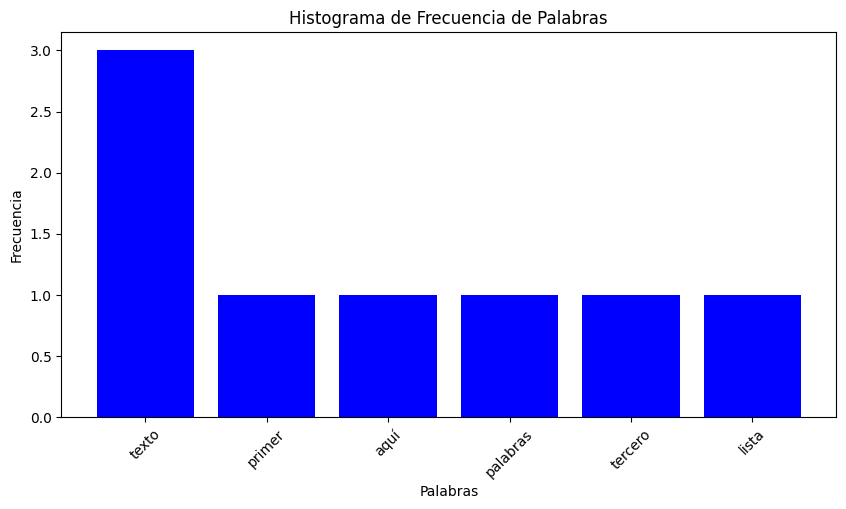

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Lista de textos de ejemplo
textos = [
    "Este es el primer texto.",
    "Aquí hay otro texto, con más palabras.",
    "Este texto es el tercero de la lista."
]

# Concatenar todos los textos en uno solo
texto_concatenado = " ".join(textos)

# Tokenización
tokens = word_tokenize(texto_concatenado.lower())

# Eliminación de puntuación
tokens = [word for word in tokens if word.isalnum()]

# Eliminación de stopwords
stop_words = set(stopwords.words('spanish'))
tokens_limpios = [word for word in tokens if word not in stop_words]

# Conteo de frecuencias
frecuencias = Counter(tokens_limpios)

# Mostrar las palabras más comunes
print(frecuencias.most_common(10))

# Crear la wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(frecuencias)

# Mostrar la wordcloud usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras")
plt.show()

# Graficar el histograma de frecuencias
palabras, counts = zip(*frecuencias.most_common(10))
plt.figure(figsize=(10, 5))
plt.bar(palabras, counts, color='blue')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencia de Palabras')
plt.xticks(rotation=45)
plt.show()


In [36]:
plt.barplot(frecuencias)

AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

## **1. Análisis Exploratorio de los Datos**
---

Describa la estructura y la naturaleza de los datos antes de comenzar con el análisis en profundidad.

### **1.1. Resumen General**
---

- ¿Cuántos documentos tiene el *dataset*?
- ¿En qué formato están guardados los datos?
- ¿Qué tamaño en MB tiene el conjunto?

---**INGRESE SU RESPUESTA**---

### **1.2. Exploración Preliminar**
---
- ¿Cuál es la naturaleza de los datos que se van a analizar en el proyecto?
- ¿Qué tipos de variables y características están presentes en el conjunto de datos?


---**INGRESE SU RESPUESTA**---

## **2. Análisis Descriptivo de los Datos**
---

Profundice en el análisis de los datos, proporcionando una descripción detallada y estadísticas clave.

### **2.1. Relaciones entre variables**
---

- ¿Se identifican patrones, tendencias o características notables?
- ¿Cómo se exploran y describen las relaciones entre variables?

---**INGRESE SU RESPUESTA**---

## **3. Carga o Adquisición de Datos**
---

Agregue el código necesario en _Python_ para obtener o cargar los datos.

### **3.1. Origen de los datos**
---
- ¿Cuál es la fuente principal de los datos?
- ¿Existen consideraciones especiales al extraer datos de esta fuente?
- ¿Cómo se obtienen los datos del origen a la plataforma de Big Data?
- ¿Se utilizan herramientas específicas?

In [ ]:
# INGRESE SU CÓDIGO

## **Créditos**
---

* **Profesor:** [Jorge E. Camargo, PhD](https://dis.unal.edu.co/~jecamargom/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).
    
**Universidad Nacional de Colombia** - *Facultad de Ingeniería*